In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../src/data/raw/TrainingData.csv", index_col = 0)

In [10]:
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

## Tipos de informações no dataset
<ul> <h3>#Colunas de features</h3>
    <br>
    <li>FTE float - Se for um empregado, indica a porcentagem de horas diárias que ele(a) trabalha.</li>
    <li>Facility_or_Department - Se uma despesa está vinculada a algum departamento ou instalação, indica-se qual é.</li>
    <li>Function_Description - Descrição da função ao qual a despesa serve.</li>
    <li>Fund_Description - Descrição da fonte dos fundos de investimento.</li>
    <li>Job_Title_Description - Indica se o orçamento é para um professor, diretor ou outro tipo de empregado</li>
    <li>Location_Description - Descrição de onde os recursos foram gastos.</li>
    <li>Object_Description - Descrição de para o que os recursos foram usados.</li>
    <li>Position_Extra - Qualquer informação extra sobre a finalidade daqueles recursos.</li>
    <li>Program_Description - Descrição do programa para o qual os recursos foram usados.</li>
    <li>SubFund_Description - Mais detalhes sobre a fonte dos fundos de investimento.</li>
    <li>Sub_Object_Description - Mais detalhes sobre o objetivo daqueles recursos.</li>
    <li>Text_1 - Qualquer texto adicional informado pelo distrito escolar.</li>
    <li>Text_2 - Qualquer texto adicional informado pelo distrito escolar.</li>
    <li>Text_3 - Qualquer texto adicional informado pelo distrito escolar.</li>
    <li>Text_4 - Qualquer texto adicional informado pelo distrito escolar.</li>
    <li>Total float - O custo total da despesa.</li>
</ul>

<ul> <h3>#Labels</h3>
    <br>
   <li>Function: Qual a finalidade específica do orçamento indicado, por exemplo: transporte escolar, pagamento de professores, recrutamento, serviços de comida. Há no total 37 tipos dessa categoria.</li>
   <li>Object_Type: Indica o que o gasto “é”: Salário base/Compensação, benefícios, equipamento e etc. Há 11 tipos dessa categoria.</li>
   <li>Operating_Status: Define o status de operação do orçamento. O ERS só trabalha com itens em operação.</li>
   <li>Position_Type: Indica qual a posição do funcionário que está ligado a aquele gasto: Diretor, professor, bibliotecário e etc. Há 25 possíveis valores para essa categoria.</li>
   <li>Pre_K: Indica se o gasto foi para a pré-escola ou não.</li>
   <li>Reporting: Indica se o orçamento veio de um órgão escolar ou não.</li>
   <li>Sharing: Quem compartilhou os gastos do item orçamentário indicado. Há 5 categorias desse tipo.</li>
   <li>Student_Type: Classificação socioeconômica dos estudantes que, caso haja,  forem beneficiados pelo recurso. São 9 valores possíveis para essa categoria.</li>
   <li>Use: Descreve a categoria de uso do recurso, exemplo: Treinamento de profissionais, serviços do negócio, bolsa estudantil e etc. Há 8 categorias desse tipo.</li>
</ul>

In [47]:
label_columns = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']

feature_columns = ['FTE', 'Facility_or_Department', 'Function_Description', 'Fund_Description', 'Job_Title_Description', 'Location_Description', 'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 'Sub_Object_Description', 'Text_1', 'Text_2', 'Text_3', 'Text_4', 'Total']

## Pré processamento nas colunas de features

<ul>
    <li>Manter todos os valores da coluna FTE entre 0.0 e 1.0</li>
    <li>Converter as colunas das labels para o tipo 'category' (mais eficiente que object)</li>
</ul>


                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


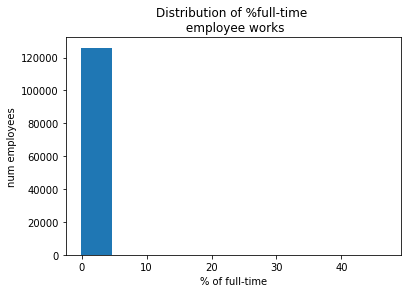

In [42]:
#---------Tarefa 1 ----------#

# Print the summary statistics
print(df.describe())

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [43]:
#Cerca de 3000 dados com FTE > 1, dividi todas por 100
mask = df['FTE'] > 1
df_ToAtt = df[mask]

df.loc[mask, 'FTE'] = df_ToAtt['FTE'].div(100)

                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.396627  1.310586e+04
std         0.446621  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.080000  4.612300e+02
75%         1.000000  3.652662e+03
max         1.000000  1.297000e+08


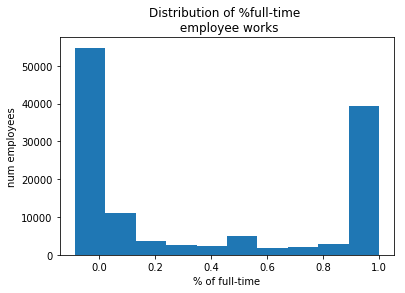

In [44]:
# Print the summary statistics
print(df.describe())

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [48]:
#---------Tarefa 2----------#

# Define the lambda function: categorize_label
categorize_label = lambda x : x.astype('category')

# Convert df[LABELS] to a categorical type
df[label_columns] = df[label_columns].apply(categorize_label, axis = 0)

# Print the converted dtypes
print(df[label_columns].dtypes)

Function            category
Object_Type         category
Operating_Status    category
Position_Type       category
Pre_K               category
Reporting           category
Sharing             category
Student_Type        category
Use                 category
dtype: object


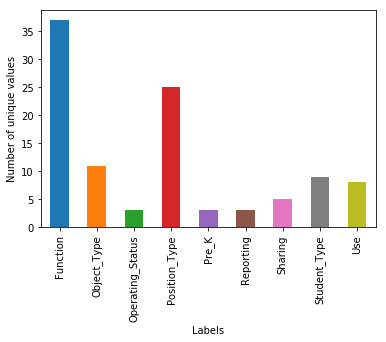

In [52]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[label_columns].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

### Salvar dataframe após pré-processamento

In [53]:
df.to_csv('../src/data/processed/TrainingData_p')